<a href="https://colab.research.google.com/github/Armandkay/Advanced-linear-algebra-PCA-/blob/main/PCA_Formative_1%5BPeer_Pair_2%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with the `fuel_econ.csv` dataset.

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

In [ ]:
# Step 1: Load and Standardize the data (use of numpy only allowed)
import numpy as np
data = np.genfromtxt("fuel_econ.csv", delimiter=",", skip_header=1)
row_nan_count = np.isnan(data).all(axis=1).sum()  # Rows that are all NaN
col_nan_count = np.isnan(data).all(axis=0).sum()  # Columns that are all NaN

print(f"Number of rows with all NaN values: {row_nan_count}")
print(f"Number of columns with all NaN values: {col_nan_count}")

# Remove rows and columns with all NaN values
data_cleaned = data[~np.isnan(data).all(axis=1)]  # Remove rows where all values are NaN
data_cleaned = data_cleaned[:, ~np.isnan(data_cleaned).all(axis=0)]  # Remove columns where all values are NaN

# Replace remaining NaN values with the mean of the respective column
col_means = np.nanmean(data_cleaned, axis=0)  # Compute the mean, ignoring NaNs
inds = np.where(np.isnan(data_cleaned))  # Find indices of NaNs
data_cleaned[inds] = np.take(col_means, inds[1])  # Replace NaNs with the column mean

# Now compute the mean and standard deviation safely
mean = np.mean(data_cleaned, axis=0)
std_dev = np.std(data_cleaned, axis=0)

standardized_data = (data_cleaned- mean) / std_dev  # Do not use sklearn (Data - Data Mean)/ Data's Standard Deviation
print(standardized_data[:5])  # Display the first few rows of standardized data

Number of rows with all NaN values: 0
Number of columns with all NaN values: 5
[[-1.73714048  0.         -1.47583548  0.28310163  0.65053594  1.46709627
  -1.21737766 -0.85996012 -0.85242986 -1.29062982 -1.39247459 -1.00832279
   1.02283829 -0.95057953 -0.94575548]
 [-1.73668367  0.         -1.47583548 -0.78181585 -0.72799833  1.86476224
  -1.21737766  0.00642675 -0.11743408  0.18494654 -0.03920038  0.07186379
  -0.29854998  0.1886082   0.1942578 ]
 [-1.73622685  0.         -1.47583548  0.28310163  0.49736547  1.86476224
  -1.21737766 -0.69441634 -0.75324472 -0.5920197  -0.85174957 -0.68633929
   0.56793413 -0.38098566 -0.37574884]
 [-1.73577004  0.         -1.47583548  0.28310163  0.49736547  1.86476224
  -1.21737766 -0.78280029 -0.830286   -0.82738386 -1.02758796 -0.81865124
   0.752062   -0.38098566 -0.37574884]
 [-1.73531322  0.         -1.47583548 -0.78181585 -0.42165738 -0.62727784
   0.73489021  0.47108294  0.43314691  0.96751585  0.99253135  0.64805881
  -0.72096098  1.32779592

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [ ]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(data_cleaned, rowvar=False)  # Calculate covariance matrix
print(cov_matrix)

[[ 4.79325309e+06  1.20431263e+02  3.65727634e+03 -2.47133355e+02
  -2.13475237e+02 -5.42518370e+02 -2.33888210e+03  1.25538750e+03
   1.81493122e+03  1.13997238e+03  1.89994311e+03  1.23287180e+03
  -2.01589834e+04 -4.91568638e+02 -4.69884696e+02]
 [ 1.20431263e+02  7.82598269e+02 -2.18304481e-01  1.03640530e+00
  -1.43329939e-01 -9.37016293e+00 -6.74607943e+01 -1.06347319e+00
  -1.60017263e+00 -2.90565979e+00 -4.62624073e+00 -1.80657944e+00
   2.52489817e+01 -2.91751527e-01 -2.91751527e-01]
 [ 3.65727634e+03 -2.18304481e-01  2.87226244e+00 -1.76079199e-01
  -1.55862272e-01  3.98469084e-01 -2.77490768e+00  7.20379807e-01
   1.02788291e+00  7.13903170e-01  1.19746444e+00  7.32472572e-01
  -1.27017502e+01 -4.45860757e-01 -4.31595520e-01]
 [-2.47133355e+02  1.03640530e+00 -1.76079199e-01  3.52808170e+00
   2.29069407e+00  1.75427170e+01 -3.89820213e-01 -8.13182057e+00
  -1.13682133e+01 -8.27252614e+00 -1.31876870e+01 -8.32195681e+00
   1.47126210e+02 -2.58521522e+00 -2.57661138e+00]
 [-2

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [ ]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)   # Perform eigendecomposition
eigenvalues, eigenvectors

(array([4.79334450e+06, 8.83933300e+03, 3.10359758e+03, 7.89676293e+02,
        5.14916878e+02, 3.64336998e+01, 1.09988146e+01, 1.05511813e+00,
        4.75074992e-01, 2.68307430e-01, 1.44384859e-01, 1.04529085e-01,
        7.52000941e-02, 1.31451641e-02, 1.43411844e-02]),
 array([[-9.99990448e-01, -4.19745923e-03, -9.14718610e-04,
          1.77307413e-05, -1.93997579e-05,  4.60546475e-06,
         -1.02260314e-05,  7.05804025e-06, -9.52634256e-06,
         -3.43454511e-04,  6.12049969e-05,  3.39675290e-05,
         -7.24155817e-04, -1.56233959e-05,  1.19727251e-06],
        [-2.51125981e-05, -3.59411033e-03,  2.06985040e-02,
         -9.84798163e-01,  1.72383996e-01, -2.22895331e-03,
          2.95238016e-03, -6.07469098e-04,  1.38344042e-04,
          4.80567703e-04,  6.97968482e-04, -1.33167574e-04,
          3.95329479e-04,  4.84439880e-05,  1.52496977e-04],
        [-7.62995427e-04, -3.29133650e-04,  2.86369332e-04,
          4.01983069e-04, -2.97529912e-04,  3.55010726e-03,
    

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

In [ ]:
# Step 5: Sort Principal Components
sorted_indices = eigenvalues.argsort()[::-1] # Sort eigenvalues in descending order
sorted_eigenvectors = eigenvectors[:, sorted_indices]   # Sort eigenvectors accordingly
sorted_eigenvectors

array([[-9.99990448e-01, -4.19745923e-03, -9.14718610e-04,
         1.77307413e-05, -1.93997579e-05,  4.60546475e-06,
        -1.02260314e-05,  7.05804025e-06, -9.52634256e-06,
        -3.43454511e-04,  6.12049969e-05,  3.39675290e-05,
        -7.24155817e-04,  1.19727251e-06, -1.56233959e-05],
       [-2.51125981e-05, -3.59411033e-03,  2.06985040e-02,
        -9.84798163e-01,  1.72383996e-01, -2.22895331e-03,
         2.95238016e-03, -6.07469098e-04,  1.38344042e-04,
         4.80567703e-04,  6.97968482e-04, -1.33167574e-04,
         3.95329479e-04,  1.52496977e-04,  4.84439880e-05],
       [-7.62995427e-04, -3.29133650e-04,  2.86369332e-04,
         4.01983069e-04, -2.97529912e-04,  3.55010726e-03,
         7.72122277e-03, -2.47246127e-02,  2.13765161e-02,
         1.25492239e-01, -6.13829694e-02, -5.26467625e-03,
         9.89439482e-01, -1.64242719e-02,  7.37312331e-03],
       [ 5.16900799e-05, -1.68082508e-02, -3.18381362e-03,
        -6.04060824e-04,  2.74144753e-03, -4.67184757

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [ ]:
# Step 6: Project Data onto Principal Components
num_components = 2  # Decide on the number of principal components to keep
centered_data = data_cleaned - mean
reduced_data =  np.dot(centered_data, sorted_eigenvectors[:, :num_components]) # Project data onto the principal components
reduced_data[:5]

array([[3803.07766525,  -90.80689693],
       [3801.55304877,   28.77471908],
       [3800.8986068 ,  -51.14931679],
       [3799.97181459,  -68.0649537 ],
       [3798.41646836,   88.46909277]])

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [14]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (3929, 2)


array([[3803.07766525,  -90.80689693],
       [3801.55304877,   28.77471908],
       [3800.8986068 ,  -51.14931679],
       [3799.97181459,  -68.0649537 ],
       [3798.41646836,   88.46909277]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

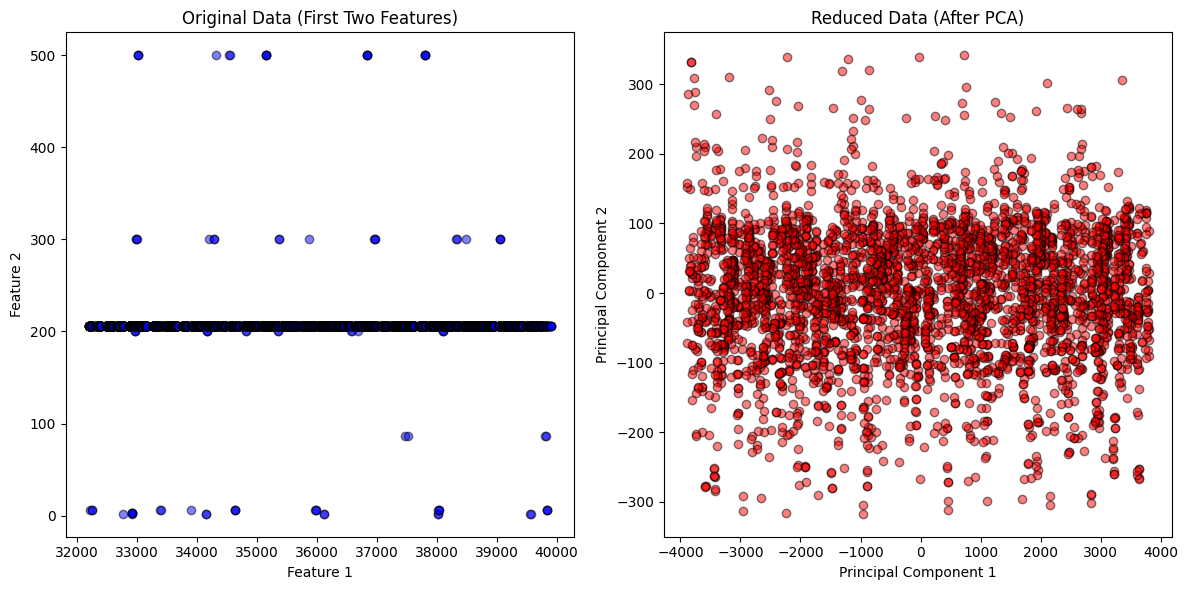

In [19]:
import matplotlib.pyplot as plt

# Step 8: Visualize Before and After PCA

# Plot original data (using the first two features for simplicity)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Left plot
plt.scatter(data_cleaned[:, 0], data_cleaned[:, 1], alpha=0.5, color='blue', edgecolors='k')
plt.title('Original Data (First Two Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot reduced data after PCA
plt.subplot(1, 2, 2)  # Right plot
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5, color='red', edgecolors='k')
plt.title('Reduced Data (After PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()